In [1]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import os,random
from tensorflow import keras
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import scipy.integrate
import scipy.special
import scipy

In [2]:
train_path=pathlib.Path('train_data/')
test_path=pathlib.Path('test_data/')
train_path

WindowsPath('train_data')

In [3]:
imgh, imgw = 64, 64

train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_ds.flow_from_directory(train_path, target_size=(imgh, imgw), batch_size=32, class_mode='binary')

test_ds = ImageDataGenerator(rescale = 1./255)
test_set = test_ds.flow_from_directory(test_path, target_size=(imgh, imgw), batch_size=32, class_mode='binary')

Found 2290 images belonging to 4 classes.
Found 975 images belonging to 4 classes.


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation = "relu",input_shape =(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation = "relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(4, activation = "sigmoid"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/50
72/72 [==============================] - 10s 132ms/step - loss: 1.2120 - accuracy: 0.4240 - val_loss: 1.1357 - val_accuracy: 0.5190
Epoch 2/50
72/72 [==============================] - 7s 94ms/step - loss: 0.9725 - accuracy: 0.5690 - val_loss: 1.0534 - val_accuracy: 0.5467
Epoch 3/50
72/72 [==============================] - 7s 93ms/step - loss: 0.8973 - accuracy: 0.5948 - val_loss: 0.9281 - val_accuracy: 0.5774
Epoch 4/50
72/72 [==============================] - 7s 95ms/step - loss: 0.8170 - accuracy: 0.6397 - val_loss: 0.9243 - val_accuracy: 0.6021
Epoch 5/50
72/72 [==============================] - 7s 96ms/step - loss: 0.7695 - accuracy: 0.6738 - val_loss: 1.0067 - val_accuracy: 0.6144
Epoch 6/50
72/72 [==============================] - 7s 95ms/step - loss: 0.7328 - accuracy: 0.6926 - val_loss: 0.9553 - val_accuracy: 0.6359
Epoch 7/50
72/72 [==============================] - 7s 94ms/step - loss: 0.7126 - accuracy: 0.7210 - val_loss: 0.8920 - val_accuracy: 0.6144
Epoch 8/50


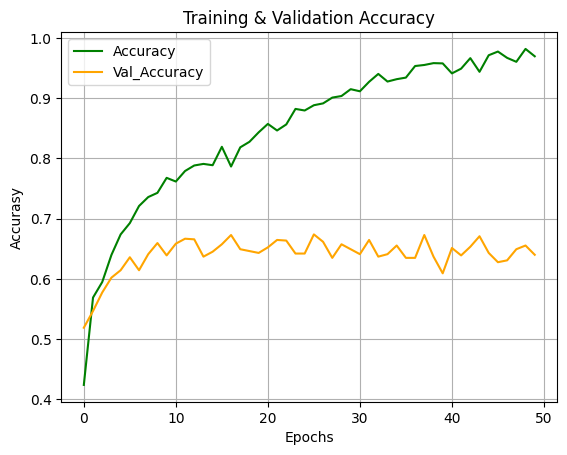

72/72 [==============================] - 5s 73ms/step - loss: 0.0823 - accuracy: 0.9712

Training loss: 0.08227494359016418

Training accuracy: 0.9711790680885315


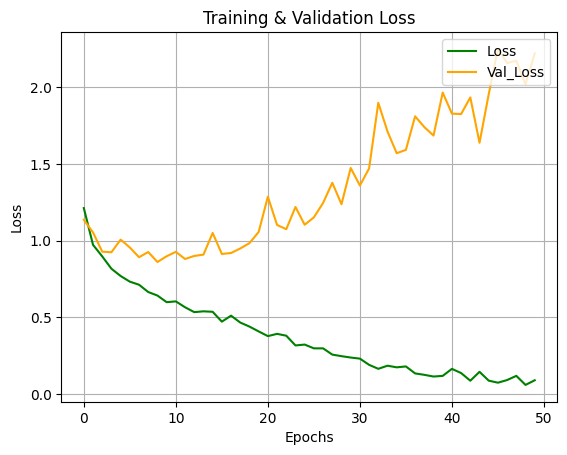

31/31 [==============================] - 1s 41ms/step - loss: 2.2202 - accuracy: 0.6400

Test loss: 2.2202022075653076

Test accuracy: 0.6399999856948853


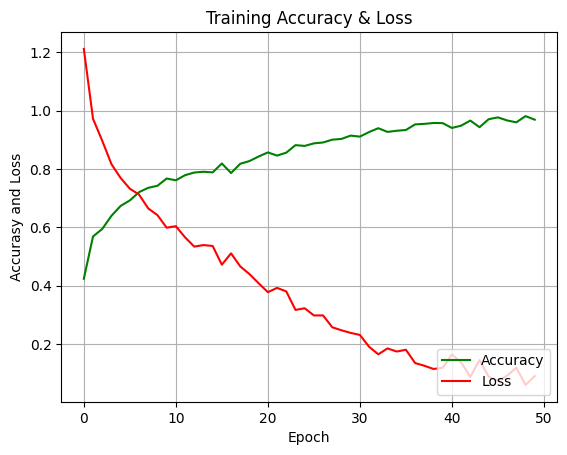

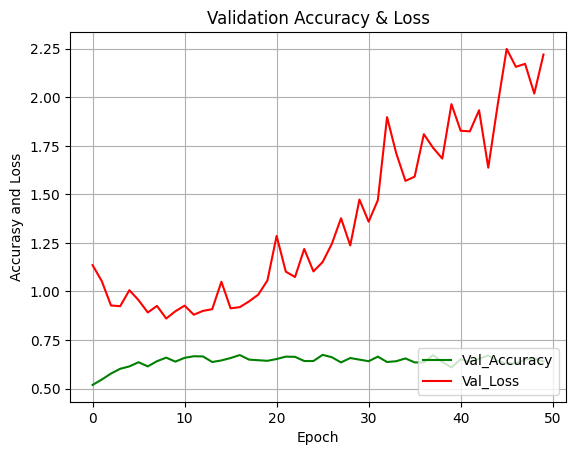

In [6]:
trainHistory = model.fit(x = training_set, validation_data = test_set, epochs = 50)

plt.title('Training & Validation Accuracy')
plt.plot(trainHistory.history['accuracy'], 'green',label='Accuracy')
plt.plot(trainHistory.history['val_accuracy'], 'orange',label='Val_Accuracy')
plt.ylabel('Accurasy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(training_set)
print('\nTraining loss:', loss)
print('\nTraining accuracy:', accuracy)

plt.title('Training & Validation Loss')
plt.plot(trainHistory.history['loss'],'green',label='Loss')
plt.plot(trainHistory.history['val_loss'],'orange',label='Val_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(test_set)
print('\nTest loss:', loss)
print('\nTest accuracy:', accuracy)

plt.plot(trainHistory.history['accuracy'],'green',label='Accuracy')
plt.plot(trainHistory.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(trainHistory.history['val_accuracy'],'green',label='Val_Accuracy')
plt.plot(trainHistory.history['val_loss'],'red',label='Val_Loss')
plt.title('Validation Accuracy & Loss')
plt.ylabel('Accurasy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

model.save("model_flowers2.h5")

In [7]:
model = keras.models.load_model("model_flowers2.h5")

1/1 [==============================] - 0s 47ms/step


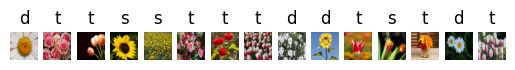

In [8]:
test_imgs = [
    image.load_img('test_data/daisy/14354051035_1037b30421_n.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/rose/14494590921_3bb1dc7b88_n.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/tulip_test/14099204939_60e6ffa4c3_n.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/sun/12471441503_d188b5f31a_m.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/sun/14348961225_09bd803317_n.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/rose/14154164774_3b39d36778.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/rose/12338444334_72fcc2fc58_m.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/tulip_test/14254329062_140c0f4f4f_n.jpg', target_size = (imgh, imgw)),
    
    image.load_img('test_data/daisy/18023717391_e2c9089e10.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/sun/14925398441_107f3e0304_n.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/tulip_test/15049902081_dd85361f8c_m.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/tulip_test/16717320956_d4b00807f2.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/rose/15255964274_cf2ecdf702.jpg', target_size = (imgh, imgw)),
    image.load_img('test_data/daisy/34693373736_9ce6d9e1c3_n.jpg', target_size = (imgh, imgw)),
    
    image.load_img('test_data/tulip_test/14097366955_84ef6369f2.jpg', target_size = (imgh, imgw)),    
]
#predictions = model.predict(test_imgs)
i=0 
fig, ax = plt.subplots(1,15)
for _img in test_imgs:
    test_img = _img
    img = image.img_to_array(test_img)
    img = np.expand_dims(img, axis = 0)
    r = model.predict(img)
    #test_set.class_indices
    if r[0][0] == 1:
        test1 = 'd'
    elif r[0][1] == 1:
        test1 = 'r'
    elif r[0][2] == 1: 
        test1 = 's'
    else:
        test1 = 't'
    
    ax[i].axis('off')
    ax[i].set_title(test1)
    ax[i].imshow(_img)
    i += 1
    
plt.show()